Import the necessary packagges

In [1]:
from scipy.spatial import distance as dist
from imutils.video import VideoStream
from imutils import face_utils
import argparse
import imutils
import time
import dlib
import cv2
import matplotlib.pyplot as plt

Function to show image with OpenCV

In [2]:
def show_img(title, img):
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Function to create landmarks on image

In [3]:
def create_dots(img, dots):
    result_img = img
    for (i, (x, y)) in enumerate(shape):
        cv2.circle(result_img, (x, y), 1, (0, 0, 255), -1)
        cv2.putText(result_img, str(i + 1), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)
    return result_img

Function to compute Eye Aspect Ratio

In [4]:
def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of vertical eye landmarks (x, y)-coordinates
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    # compute the euclidean distance between the horizontal eye landmark (x, y)-coordinates
    C = dist.euclidean(eye[0], eye[3])
    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
    # return the eye aspect ratio
    return ear

Function to compute Mouth Aspect Ratio

In [5]:
def mouth_aspect_ratio(mouth):
    # compute the euclidean distances between the three sets of vertical mouth landmarks (x, y)-coordinates
    A = dist.euclidean(mouth[1], mouth[7])
    B = dist.euclidean(mouth[2], mouth[6])
    C = dist.euclidean(mouth[3], mouth[5])
    # compute the euclidean distance between the horizontal mouth landmark (x, y)-coordinates
    D = dist.euclidean(mouth[0], mouth[4])
    # compute the mouth aspect ratio
    mar = (A + B + C) / (2.0 * D)
    # return the mouth aspect ratio
    return mar

Initialize dlibs's face detector and then cretae facial landmark predictor

In [6]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

get the image

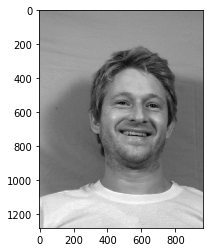

In [7]:
img_path = "D:/Alwi/muct-master/jpg/i002qd-mn.jpg"
IMG_SIZE = (960,1280)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, IMG_SIZE)
plt.imshow(img, cmap='gray')

detect faces in the grayscale frame

In [8]:
rects = detector(img, 0)
face_count = len(rects)
print(str(face_count)+ ' face(s) found')

1 face(s) found


Process just first found face

In [9]:
rect = rects[0]

Determine the facial landmarks for the face region

In [10]:
shape = predictor(img, rect)
shape = face_utils.shape_to_np(shape)

Draw landmarks

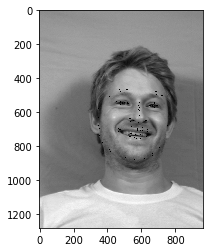

In [11]:
result_img = create_dots(img, shape)
show_img("resulting image with landmarks", result_img)
plt.imshow(result_img, cmap='gray')

Grab indexes for the left and right eye respectively

In [12]:
(lStart, lEnd) = (42, 48)
(rStart, rEnd) = (36, 42)
(mStart, mEnd) = (60, 68)

extract the left and right eye coordinates

In [13]:
leftEye = shape[lStart:lEnd]
rightEye = shape[rStart:rEnd]
mouth = shape[mStart:mEnd]

Compute Eye Aspect Ratio

In [14]:
#compute the eye aspect ratio for both eyes
leftEAR = eye_aspect_ratio(leftEye)
rightEAR = eye_aspect_ratio(rightEye)

#computr mouth aspect ratio
mar = mouth_aspect_ratio(mouth)

# average the eye aspect ratio together for both eyes
ear = (leftEAR + rightEAR) / 2.0

Print EAR and MAR

In [15]:
print(ear, mar)

0.22268437183681303 0.2290880913457433
